In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset
%matplotlib inline

C:\ProgramData\AnacondaV\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
#loading the data
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = [1], it's a 'cat'picture.


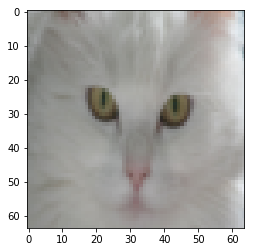

In [10]:
#picture example
index = 50
plt.imshow(train_set_x_orig[index])
print("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") + "'picture.")

In [11]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [12]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T
print("train set x after flatten = "+ str(train_set_x_flatten.shape))
print("train set y "+ str(train_set_y.shape))
print("test set x after flatten = "+ str(test_set_x_flatten.shape))
print("test set y= "+ str(test_set_y.shape))
print("sanity check after reshaping = "+ str(train_set_x_flatten[0:5,0]))

train set x after flatten = (12288, 209)
train set y (1, 209)
test set x after flatten = (12288, 50)
test set y= (1, 50)
sanity check after reshaping = [17 31 56 22 33]


In [13]:
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [21]:
def sigmoid(z):
    z = 1.0/ (1+np.exp(-z))
    return z
#checking the sigmoid
print("sigmoid([0,2]) = "+ str(sigmoid(np.array([0,2]))))

sigmoid([0,2]) = [0.5        0.88079708]


In [22]:
def init_zero(dim):
    w= np.zeros((dim,1))
    b = 0
    return w,b
#checking
dim = 2
w,b = init_zero(dim)
print("w = "+ str(w))
print("b = "+ str(b))

w = [[0.]
 [0.]]
b = 0


In [23]:
def propagate (w,b,X,Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X)+b)
    cost = -np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)))/m
    dw = np.dot(X, (A-Y).T)/m
    db = np.sum(A-Y)/m
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape==())
    grads = {'dw' : dw, 
             'db' : db}
    return grads,cost

In [17]:
w, b, X, Y = np.array([[1],[2]]),2,np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads['dw']))
print ("db = " + str(grads['db']))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [18]:
def optimize (w,b,X,Y,num_iterations,learning_rate,print_cost = False):
    costs = []
    for i in range (num_iterations):
        grads,cost = propagate(w,b,X,Y)
        dw = grads['dw']
        db = grads['db']
        
        w = w-learning_rate*dw
        b = b-learning_rate*db
        if i%100 == 0:
            costs.append(cost)
        if print_cost and i%100 == 0:
                print("cost after iteration %i: %f"%(i,cost))
    params = {'w': w,
                'b':b}
    grads = {'dw': dw,
                'db':db}
    return params, grads,costs

In [19]:
params,grads,costs = optimize(w,b,X,Y,num_iterations = 100, learning_rate = 0.009, print_cost = False)
print("w = "+ str(params['w']))
print("b = "+ str(params['b']))
print("dw = "+ str(grads['dw']))
print("db = "+ str(grads["db"]))


w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [20]:
def predict(w,b,X):
    m= X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    A = sigmoid(np.dot(w.T,X)+b)
    for i in range(A.shape[1]):
        Y_prediction = np.around(A)
    assert(Y_prediction.shape == (1,m))
    return Y_prediction


In [20]:
print ("predictions:" + str(predict(w,b,X)))

predictions:[[1. 1.]]


In [25]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    #initialize
    w,b = init_zero(X_train.shape[0])
    #gradient descent
    parameters,grads,costs = optimize(w,b,X_train,Y_train, num_iterations, learning_rate, print_cost =False)
    w = parameters["w"]
    b = parameters["b"]
    #predict test/train set examples
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)
    # print test/train errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train-Y_train))*100))
    print("test accuracy: {} %".format(100-np.mean(np.abs(Y_prediction_test - Y_test))*100))
    
    d = {"costs":costs,
        "Y_prediction_test": Y_prediction_test,
        "Y_prediction_train" : Y_prediction_train,
        "w" :w,
        "b" :b,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations}
    return d

In [26]:
d = model(train_set_x, train_set_y,test_set_x,test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

test accuracy: 99.04306220095694 %
test accuracy: 70.0 %


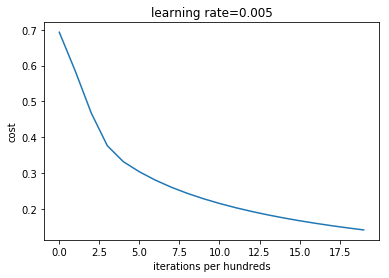

In [27]:
#plot learning curve
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations per hundreds')
plt.title("learning rate=" + str(d["learning_rate"]))
plt.show()


learning rate is:0.01
test accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------

learning rate is:0.001
test accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------

learning rate is:0.0001
test accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------



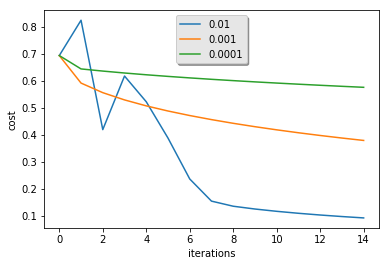

In [33]:
#Compare learning rates
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is:" + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n'+ "-------------------------------------"+"\n")
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')
                                                                     
legend = plt.legend(loc = 'upper center', shadow = True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

C:\ProgramData\AnacondaV\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys
C:\ProgramData\AnacondaV\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


y = 1.0, your algorithm predicts a "cat" picture.


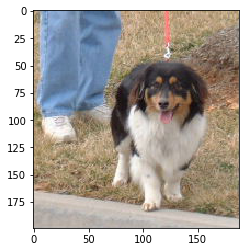

In [36]:
#Try with your own images
   # change this to the name of your image file 
## END CODE HERE ##

# We preprocess the image to fit your algorithm.
fname = "2.jpg"
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((1, num_px*num_px*3)).T
my_predicted_image = predict(d["w"], d["b"], my_image)

plt.imshow(image)
print("y = " + str(np.squeeze(my_predicted_image)) + ", your algorithm predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")